In [1]:
# Dataset used for this project can be found here 
# https://www.kaggle.com/sidhartharya/wazirx-cryptocurrency-data?select=btcusdt.csv

In [2]:
# load dataset into pandas and explore

import pandas as pd


data = pd.read_csv('./data/btcusdt.csv')
data.tail(20)

,Date,Open,High,Low,Close,Volume
53499,2021-07-29 04:30:00,39826.0,39988.0,39680.0,39680.0,0.0714
53500,2021-07-29 05:00:00,39745.0,39840.0,39508.0,39508.0,0.0610
53501,2021-07-29 05:30:00,39508.0,39782.0,39508.0,39727.0,0.0250
53502,2021-07-29 06:00:00,39727.0,39932.0,39545.0,39840.0,0.0902
53503,2021-07-29 06:30:00,39840.0,40126.0,39840.0,40093.0,0.1904
53504,2021-07-29 07:00:00,40007.0,40009.0,39824.0,39824.0,0.5915
53505,2021-07-29 07:30:00,39824.0,40167.0,39734.0,40009.0,0.0708
53506,2021-07-29 08:00:00,40177.0,40177.0,39963.0,39992.0,0.2186
53507,2021-07-29 08:30:00,39991.0,40180.0,39991.0,40007.0,0.1900
53508,2021-07-29 09:00:00,40007.0,40158.0,40007.0,40044.0,0.0373


In [3]:
data.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [4]:
# convert date column to datetime format for referencing

data['Date'] = data['Date'].apply(lambda x: pd.to_datetime(x))

data.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [5]:
# drop high and low columns 

data = data.drop(['High', 'Low'], axis=1)



In [6]:
data.tail(20)

,Date,Open,Close,Volume
53499,2021-07-29 04:30:00,39826.0,39680.0,0.0714
53500,2021-07-29 05:00:00,39745.0,39508.0,0.0610
53501,2021-07-29 05:30:00,39508.0,39727.0,0.0250
53502,2021-07-29 06:00:00,39727.0,39840.0,0.0902
53503,2021-07-29 06:30:00,39840.0,40093.0,0.1904
53504,2021-07-29 07:00:00,40007.0,39824.0,0.5915
53505,2021-07-29 07:30:00,39824.0,40009.0,0.0708
53506,2021-07-29 08:00:00,40177.0,39992.0,0.2186
53507,2021-07-29 08:30:00,39991.0,40007.0,0.1900
53508,2021-07-29 09:00:00,40007.0,40044.0,0.0373


In [7]:
data = data.set_index('Date')
data.tail()

,Open,Close,Volume
Date,,,
2021-07-29 12:00:00,40484.0,40221.0,0.0394
2021-07-29 12:30:00,40366.0,40208.0,0.0274
2021-07-29 13:00:00,40208.0,40133.0,0.0792
2021-07-29 13:30:00,40142.0,39747.0,0.1701
2021-07-29 14:00:00,39747.0,39650.0,0.1627


In [14]:
# We are trying to predict closing price on 4-hour intervals. Going to remove the 'Open' price column

data.drop('Open', axis=1, inplace=True)



KeyError: "['Open'] not found in axis"

In [16]:
data.tail(35)

,Close,Volume
Date,,
2021-07-28 21:00:00,39966.0,0.4994
2021-07-28 21:30:00,40234.0,0.0589
2021-07-28 22:00:00,39987.0,0.0655
2021-07-28 22:30:00,40178.0,0.0474
2021-07-28 23:00:00,39830.0,0.0095
2021-07-28 23:30:00,39988.0,0.0131
2021-07-29 00:00:00,39876.0,0.0405
2021-07-29 00:30:00,39775.0,0.0179
2021-07-29 01:00:00,39775.0,0.0156


In [17]:
# now to resample and aggregate half hourly data into 4 hour data.
# taking the sum of volume column as we want total volume in the time period.
# taking first value for closing price as this represents price at the listed time index.

data_4hr = data.resample('4H').agg({'Close': 'first', 'Volume': sum})

In [18]:
data_4hr.tail()

,Close,Volume
Date,,
2021-07-28 20:00:00,39501.0,1.7003
2021-07-29 00:00:00,39876.0,0.6711
2021-07-29 04:00:00,39826.0,1.1360
2021-07-29 08:00:00,39992.0,1.7867
2021-07-29 12:00:00,40221.0,0.4788


In [19]:
data_4hr.shape

(6691, 2)

In [20]:
# starting feature engineering. testing out 7 day moving average before moving to 50 and 200 day

data_4hr['7day_MA'] = data_4hr.Close.rolling('7D').mean()

In [21]:
data_4hr.tail()

,Close,Volume,7day_MA
Date,,,
2021-07-28 20:00:00,39501.0,1.7003,35306.261905
2021-07-29 00:00:00,39876.0,0.6711,35492.880952
2021-07-29 04:00:00,39826.0,1.1360,35683.642857
2021-07-29 08:00:00,39992.0,1.7867,35874.738095
2021-07-29 12:00:00,40221.0,0.4788,36074.071429


In [22]:
# 50 and 200 day moving average columns created

data_4hr['50day_MA'] = data_4hr.Close.rolling('50D').mean()
data_4hr['200day_MA'] = data_4hr.Close.rolling('200D').mean()

In [24]:
data_4hr.tail()

,Close,Volume,7day_MA,50day_MA,200day_MA
Date,,,,,
2021-07-28 20:00:00,39501.0,1.7003,35306.261905,34422.016667,44652.707500
2021-07-29 00:00:00,39876.0,0.6711,35492.880952,34442.876667,44652.313333
2021-07-29 04:00:00,39826.0,1.1360,35683.642857,34467.206667,44651.293333
2021-07-29 08:00:00,39992.0,1.7867,35874.738095,34487.856667,44650.821667
2021-07-29 12:00:00,40221.0,0.4788,36074.071429,34507.473333,44650.882500


<ipython-input-54-0215a632b0cc>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


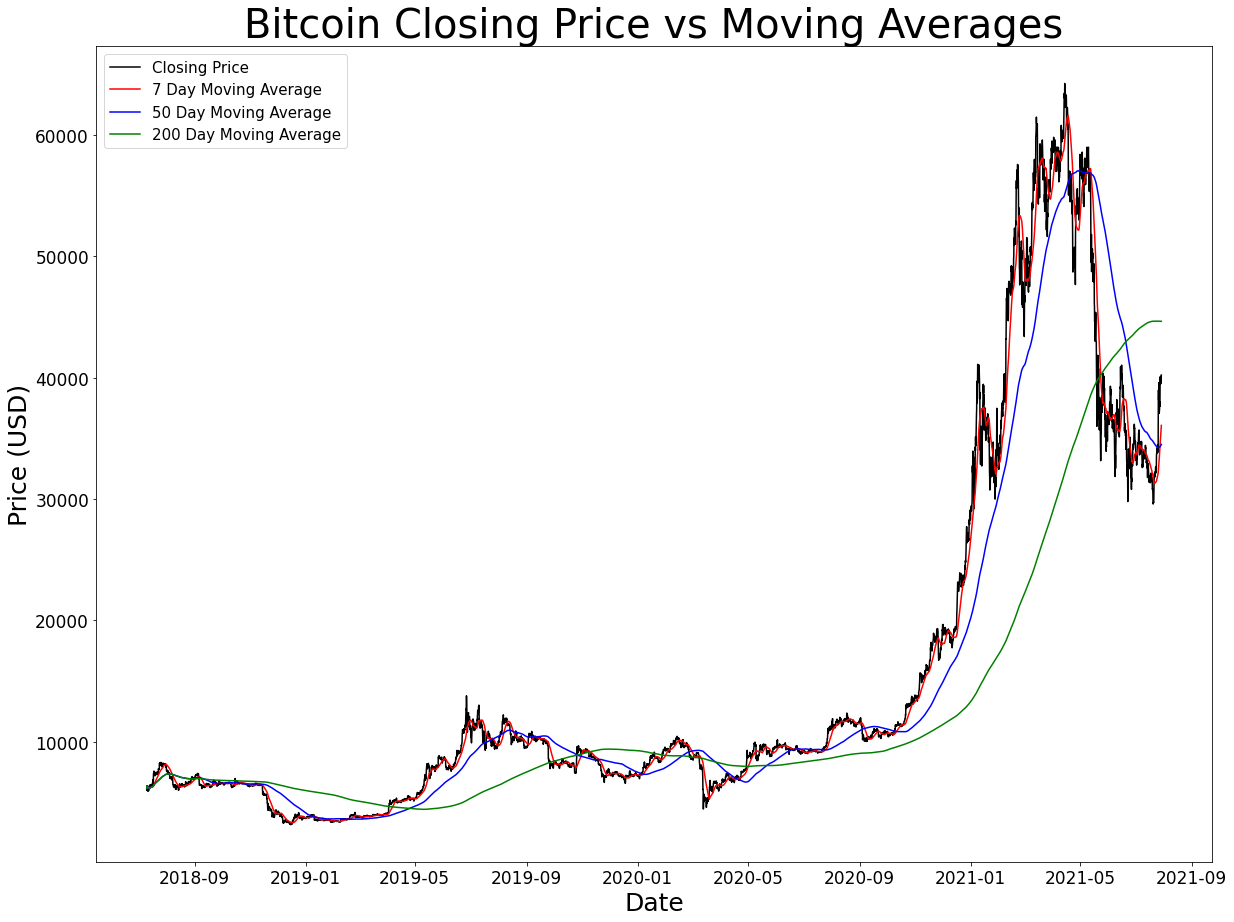

In [54]:
# plotting to visualize price against different moving averages

import matplotlib.pyplot as plt
%matplotlib inline


fig, ax = plt.subplots(figsize=(20,15))
ax.plot(data_4hr.index, data_4hr.Close, color='black', label='Closing Price')
ax.plot(data_4hr.index, data_4hr['7day_MA'], color='red', label='7 Day Moving Average')
ax.plot(data_4hr.index, data_4hr['50day_MA'], color='blue', label='50 Day Moving Average')
ax.plot(data_4hr.index, data_4hr['200day_MA'], color='green', label='200 Day Moving Average')
ax.legend(loc='best', fontsize=15)
ax.set_title('Bitcoin Closing Price vs Moving Averages', fontsize=40)
ax.set_ylabel('Price (USD)', fontsize=25)
ax.set_xlabel('Date', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=17)

fig.show()



In [55]:
data_4hr.tail()

,Close,Volume,7day_MA,50day_MA,200day_MA
Date,,,,,
2021-07-28 20:00:00,39501.0,1.7003,35306.261905,34422.016667,44652.707500
2021-07-29 00:00:00,39876.0,0.6711,35492.880952,34442.876667,44652.313333
2021-07-29 04:00:00,39826.0,1.1360,35683.642857,34467.206667,44651.293333
2021-07-29 08:00:00,39992.0,1.7867,35874.738095,34487.856667,44650.821667
2021-07-29 12:00:00,40221.0,0.4788,36074.071429,34507.473333,44650.882500


In [60]:
# next features to input will be past 3 days of closing prices and volumes

# will use a test portion of dataframe to ensure results are as desired

df_tester = data_4hr.head()
for x in range(1,5):
    df_tester[f'Close_{str(x)}'] = df_tester['Close'].shift(x)

<ipython-input-60-9ac5ccf8af4b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tester[f'Close_{str(x)}'] = df_tester['Close'].shift(x)


In [61]:
df_tester

,Close,Volume,7day_MA,50day_MA,200day_MA,Close_1,Close_2,Close_3,Close_4
Date,,,,,,,,,
2018-07-10 12:00:00,6340.93,0.0152,6340.930,6340.930,6340.930,NaN,NaN,NaN,NaN
2018-07-10 16:00:00,6000.00,0.1740,6170.465,6170.465,6170.465,6340.93,NaN,NaN,NaN
2018-07-10 20:00:00,6334.73,0.0072,6225.220,6225.220,6225.220,6000.00,6340.93,NaN,NaN
2018-07-11 00:00:00,6332.24,0.0444,6251.975,6251.975,6251.975,6334.73,6000.00,6340.93,NaN
2018-07-11 04:00:00,6304.45,0.1102,6262.470,6262.470,6262.470,6332.24,6334.73,6000.00,6340.93


Since we want the information for the previous 3 days worth of intervals, we will use 3 days * 8 intervals per day = 24 intervals each for volume and closing price

After this is completed, we will drop the rows with NaN values to allow for consistent information to be passed into the model.




In [62]:
# setting loop to create new columns

for interval in range(1,25):        # range does not include the last number given
    data_4hr[f'Close_-{str(interval)}'] = data_4hr['Close'].shift(interval)
    data_4hr[f'Volume_-{str(interval)}'] = data_4hr['Volume'].shift(interval)

In [63]:
data_4hr.head()

,Close,Volume,7day_MA,50day_MA,200day_MA,Close_-1,Volume_-1,Close_-2,Volume_-2,Close_-3,...,Close_-20,Volume_-20,Close_-21,Volume_-21,Close_-22,Volume_-22,Close_-23,Volume_-23,Close_-24,Volume_-24
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-10 12:00:00,6340.93,0.0152,6340.930,6340.930,6340.930,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-10 16:00:00,6000.00,0.1740,6170.465,6170.465,6170.465,6340.93,0.0152,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-10 20:00:00,6334.73,0.0072,6225.220,6225.220,6225.220,6000.00,0.1740,6340.93,0.0152,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-11 00:00:00,6332.24,0.0444,6251.975,6251.975,6251.975,6334.73,0.0072,6000.00,0.1740,6340.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-11 04:00:00,6304.45,0.1102,6262.470,6262.470,6262.470,6332.24,0.0444,6334.73,0.0072,6000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# remove rows containing NaN values

data_4hr.dropna(inplace=True)
data_4hr.head()

,Close,Volume,7day_MA,50day_MA,200day_MA,Close_-1,Volume_-1,Close_-2,Volume_-2,Close_-3,...,Close_-20,Volume_-20,Close_-21,Volume_-21,Close_-22,Volume_-22,Close_-23,Volume_-23,Close_-24,Volume_-24
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-14 12:00:00,6442.000,0.1320,6235.748600,6235.748600,6235.748600,6397.000,0.4157,6444.000,0.1554,6450.000,...,6304.45,0.1102,6332.24,0.0444,6334.73,0.0072,6000.00,0.1740,6340.93,0.0152
2018-07-14 16:00:00,6443.999,0.2065,6243.758231,6243.758231,6243.758231,6442.000,0.1320,6397.000,0.4157,6444.000,...,6333.29,0.1289,6304.45,0.1102,6332.24,0.0444,6334.73,0.0072,6000.00,0.1740
2018-07-14 20:00:00,6310.000,0.0147,6246.211630,6246.211630,6246.211630,6443.999,0.2065,6442.000,0.1320,6397.000,...,5940.00,0.1647,6333.29,0.1289,6304.45,0.1102,6332.24,0.0444,6334.73,0.0072
2018-07-15 00:00:00,6310.000,0.0118,6248.489786,6248.489786,6248.489786,6310.000,0.0147,6443.999,0.2065,6442.000,...,6333.29,0.0833,5940.00,0.1647,6333.29,0.1289,6304.45,0.1102,6332.24,0.0444
2018-07-15 04:00:00,6445.000,0.4951,6255.266000,6255.266000,6255.266000,6310.000,0.0118,6310.000,0.0147,6443.999,...,6332.09,0.0000,6333.29,0.0833,5940.00,0.1647,6333.29,0.1289,6304.45,0.1102


In [65]:
data_4hr.tail()

,Close,Volume,7day_MA,50day_MA,200day_MA,Close_-1,Volume_-1,Close_-2,Volume_-2,Close_-3,...,Close_-20,Volume_-20,Close_-21,Volume_-21,Close_-22,Volume_-22,Close_-23,Volume_-23,Close_-24,Volume_-24
Date,,,,,,,,,,,,,,,,,,,,,
2021-07-28 20:00:00,39501.0,1.7003,35306.261905,34422.016667,44652.707500,39680.0,2.0433,40119.0,3.3157,39732.0,...,34490.0,1.3215,34396.0,0.7262,34017.0,0.9088,33822.0,2.6263,34205.0,1.5605
2021-07-29 00:00:00,39876.0,0.6711,35492.880952,34442.876667,44652.313333,39501.0,1.7003,39680.0,2.0433,40119.0,...,33854.0,1.6524,34490.0,1.3215,34396.0,0.7262,34017.0,0.9088,33822.0,2.6263
2021-07-29 04:00:00,39826.0,1.1360,35683.642857,34467.206667,44651.293333,39876.0,0.6711,39501.0,1.7003,39680.0,...,34388.0,0.3816,33854.0,1.6524,34490.0,1.3215,34396.0,0.7262,34017.0,0.9088
2021-07-29 08:00:00,39992.0,1.7867,35874.738095,34487.856667,44650.821667,39826.0,1.1360,39876.0,0.6711,39501.0,...,34566.0,5.7212,34388.0,0.3816,33854.0,1.6524,34490.0,1.3215,34396.0,0.7262
2021-07-29 12:00:00,40221.0,0.4788,36074.071429,34507.473333,44650.882500,39992.0,1.7867,39826.0,1.1360,39876.0,...,38183.0,6.1060,34566.0,5.7212,34388.0,0.3816,33854.0,1.6524,34490.0,1.3215


In [66]:
# save this data into a csv for further use and exploration

data_4hr.to_csv('data_4hr.csv')